In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
train = pd.read_csv('../Data/Fire/PJT002_train.csv')

train.sample()

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
49815,107368,2018-01-09 01:22:57,NaN,NaN,5,0.0,0.0,0.0,NaN,NaN,...,N,223,0,0,8617,54545,8376,86,0,N


In [31]:
pd.DataFrame(train.columns)

,0
0,id
1,dt_of_fr
2,bldng_us
3,bldng_archtctr
4,bldng_cnt
5,bldng_ar
6,ttl_ar
7,lnd_ar
8,dt_of_athrztn
9,ttl_grnd_flr


In [32]:
# train[:16]
# # train[137:]

In [33]:
train.isnull().sum()

id                          0
dt_of_fr                    0
bldng_us                27677
bldng_archtctr          27665
bldng_cnt                   0
bldng_ar                    0
ttl_ar                      0
lnd_ar                      0
dt_of_athrztn           27581
ttl_grnd_flr            10210
ttl_dwn_flr             11005
bldng_us_clssfctn       29343
tmprtr                     13
prcpttn                 53629
wnd_spd                    33
wnd_drctn                 221
hmdt                       22
gas_engry_us_201401     53825
ele_engry_us_201401     43550
gas_engry_us_201402     53825
ele_engry_us_201402     43550
gas_engry_us_201403     53825
ele_engry_us_201403     43550
gas_engry_us_201404     53825
ele_engry_us_201404     43550
gas_engry_us_201405     53825
ele_engry_us_201405     43550
gas_engry_us_201406     53825
ele_engry_us_201406     43550
gas_engry_us_201407     53825
                        ...  
lw_13101410             58916
lw_13111010             58899
lw_1311111

In [34]:
# 전기 가스 제외 나머지 칼럼
columns = ['id', 'dt_of_fr', 'bldng_us', 'bldng_archtctr', 'bldng_cnt'
           , 'bldng_ar', 'ttl_ar', 'lnd_ar', 'dt_of_athrztn', 'ttl_grnd_flr'
           , 'ttl_dwn_flr', 'bldng_us_clssfctn', 'tmprtr', 'prcpttn'
           , 'wnd_spd', 'wnd_drctn', 'hmdt', 'jmk'
           , 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc'
           , 'mlt_us_yn', 'cctv_dstnc', 'cctv_in_100m'
           , 'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc'
           , 'ahsm_dstnc', 'no_tbc_zn_dstnc', 'bldng_cnt_in_50m', 'fr_yn'
          ]

In [35]:
# NULL 값 없는 칼럼 전체

# 'emd_nm', 4개
# tmprtr                   13
# wnd_spd                  33
# hmdt                     22
# emd_nm                    4
# hm_cnt                  701
# fr_mn_cnt                41
columns = ['id', 'dt_of_fr', 'bldng_cnt', 'bldng_ar', 'ttl_ar', 'lnd_ar'
           , 'jmk', 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc'
           , 'mlt_us_yn', 'cctv_dstnc', 'cctv_in_100m'
           , 'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc'
           , 'ahsm_dstnc', 'no_tbc_zn_dstnc', 'bldng_cnt_in_50m', 'fr_yn'
          ]

df = train[columns]

In [39]:
df.sample()

,id,dt_of_fr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,jmk,fr_sttn_dstnc,fr_wthr_fclt_dstnc,mlt_us_yn,...,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn,year,month,day,hour,minute,second
9698,134726,2016-02-22 05:56:08,7,0.0,0.0,0.0,대,3136,131,N,...,14013,117,0,N,2016,2,22,5,56,8


In [164]:
df[~df['fire_yes']]

,id,dt_of_fr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,jmk,fr_sttn_dstnc,fr_wthr_fclt_dstnc,mlt_us_yn,...,bldng_cnt_in_50m,fr_yn,year,month,day,hour,minute,second,fire_yes,year-month
0,133759,2015-10-03 02:33:46,3,112.8600,112.8600,200.00,대,1727,609,N,...,0,N,2015,10,3,2,33,46,False,2015-10
1,96248,2016-11-13 17:05:57,3,721.8200,1109.5400,0.00,대,2659,79,N,...,0,N,2016,11,13,17,5,57,False,2016-11
2,71317,2016-11-21 12:46:36,4,47.0600,47.0600,288.00,대,4093,259,N,...,1,N,2016,11,21,12,46,36,False,2016-11
3,86638,2016-11-07 02:50:14,2,171.4500,176.6400,1379.00,주,5931,103,N,...,0,N,2016,11,7,2,50,14,False,2016-11
4,97748,2014-01-28 16:36:43,4,0.0000,0.0000,0.00,대,10433,8302,N,...,0,N,2014,1,28,16,36,43,False,2014-01
9,85144,2014-01-18 11:00:03,1,158.5700,254.5300,340.00,대,4894,174,N,...,6,N,2014,1,18,11,0,3,False,2014-01
11,131084,2016-05-19 10:49:16,1,128.5000,197.7100,259.00,대,2942,302,N,...,0,N,2016,5,19,10,49,16,False,2016-05
12,105894,2015-02-09 03:36:02,3,70.6500,70.6500,274.00,대,3522,317,N,...,0,N,2015,2,9,3,36,2,False,2015-02
13,122039,2015-02-21 05:00:38,2,59.1000,59.1000,327.00,대,5474,88,N,...,1,N,2015,2,21,5,0,38,False,2015-02
14,93985,2018-02-06 10:34:36,2,204.0000,204.0000,618.00,대,2438,443,N,...,0,N,2018,2,6,10,34,36,False,2018-02


## fr_yn One HOt Encoding
Y 1
N 0

In [40]:
df['fr_yn'].unique()

array(['N', 'Y'], dtype=object)

In [41]:
df['fire_yes'] = df['fr_yn'] == 'Y'

df[['fr_yn', 'fire_yes']].sample()

,fr_yn,fire_yes
32667,N,False


# datetime Parsing 
dt_of_fr 화재 신고 일시?

In [47]:
df['year'] = pd.to_datetime(df['dt_of_fr']).dt.year
df['month'] = pd.to_datetime(df['dt_of_fr']).dt.month
df['day'] = pd.to_datetime(df['dt_of_fr']).dt.day
df['hour'] = pd.to_datetime(df['dt_of_fr']).dt.hour
df['minute'] = pd.to_datetime(df['dt_of_fr']).dt.minute
df['second'] = pd.to_datetime(df['dt_of_fr']).dt.second

df['year-month'] = df['dt_of_fr'].apply(lambda x: x[:7])

df[['dt_of_fr', 'year-month', 'year', 'month', 'day', 'hour', 'minute', 'second']].sample()

,dt_of_fr,year-month,year,month,day,hour,minute,second
32864,2014-09-05 16:26:28,2014-09,2014,9,5,16,26,28


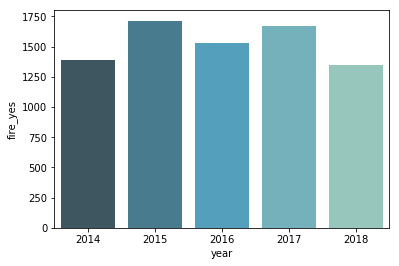

In [70]:
data = pd.DataFrame(df.groupby('year')['fire_yes'].sum()).reset_index()

sns.barplot(x='year', y='fire_yes', data=data, palette='GnBu_d')

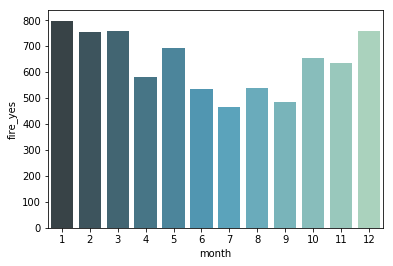

In [69]:
data = pd.DataFrame(df.groupby('month')['fire_yes'].sum()).reset_index()

sns.barplot(x='month', y='fire_yes', data=data, palette='GnBu_d')

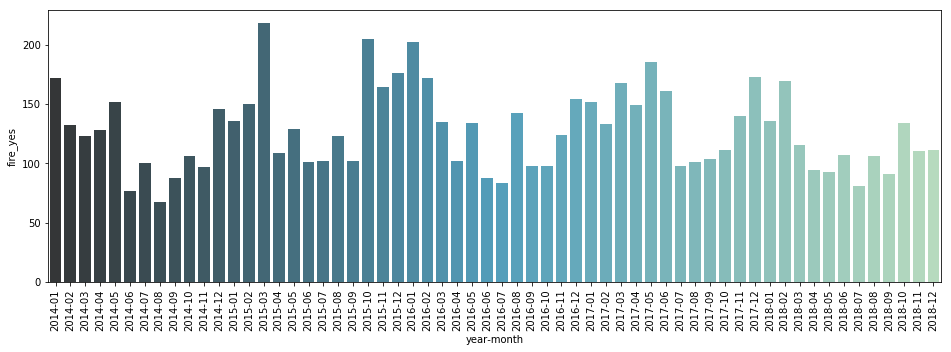

In [80]:
data = pd.DataFrame(df.groupby('year-month')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 5])
sns.barplot(x='year-month', y='fire_yes', data=data, palette='GnBu_d')
plt.xticks(rotation=90)
plt.show()

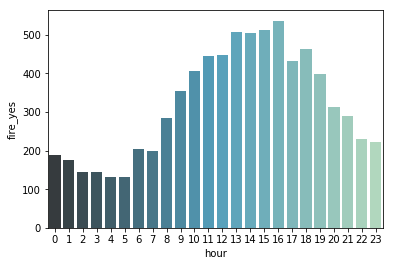

In [73]:
data = pd.DataFrame(df.groupby('hour')['fire_yes'].sum()).reset_index()

sns.barplot(x='hour', y='fire_yes', data=data, palette='GnBu_d')
plt.show()

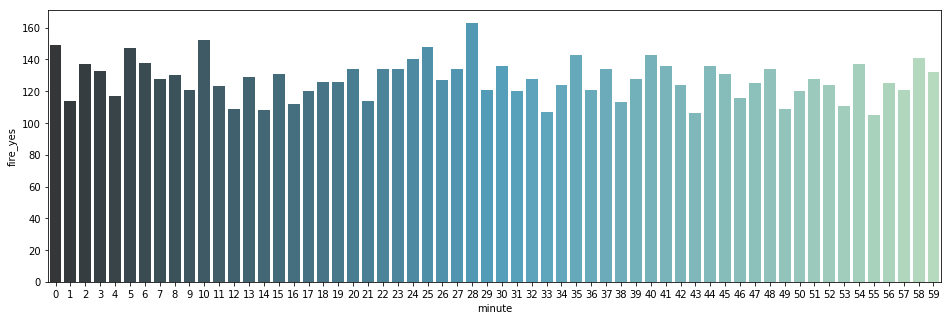

In [79]:
data = pd.DataFrame(df.groupby('minute')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 5])
sns.barplot(x='minute', y='fire_yes', data=data, palette='GnBu_d')
plt.show()

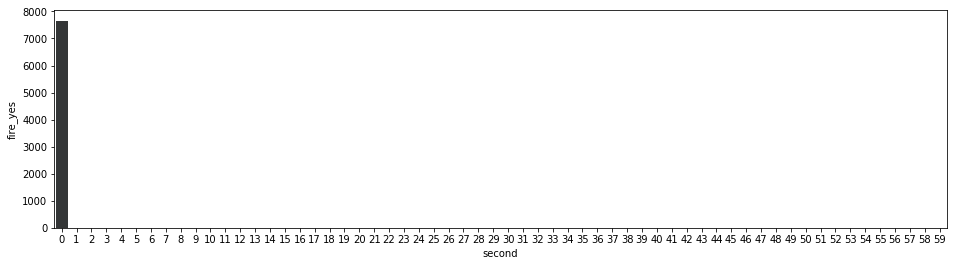

In [76]:
data = pd.DataFrame(df.groupby('second')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 4])
sns.barplot(x='second', y='fire_yes', data=data, palette='GnBu_d')
plt.show()

In [42]:
df.corr()
# second -0.5 :화재발생은 0초에만 있어서
# fr_wthr_fclt_dstnc -0.16: 소방용수시설과 가까울수록 화재발생
# ahsm_dstnc 0.11: 
# fr_wthr_fclt_in_100m 0.09
# bldng_ar 0.08

,id,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,fr_sttn_dstnc,fr_wthr_fclt_dstnc,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,...,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,year,month,day,hour,minute,second,fire_yes
id,1.000000,-0.001038,0.005470,-0.000870,0.000515,-0.000474,0.008163,-0.001483,0.001142,-0.007934,...,0.001546,0.004541,0.001812,-0.002544,-0.001609,-0.000267,-0.000414,-0.012124,-0.000104,-0.002368
bldng_cnt,-0.001038,1.000000,0.530414,0.189012,0.443320,0.009314,-0.014234,0.010925,-0.066528,-0.051694,...,-0.003087,0.029456,-0.048917,0.002270,0.000446,-0.004154,0.008258,-0.000111,-0.025870,0.056176
bldng_ar,0.005470,0.530414,1.000000,0.329309,0.604804,-0.029663,-0.005821,-0.011676,-0.014838,-0.008633,...,0.034578,-0.014944,-0.009598,0.001947,0.003814,-0.000062,0.011439,-0.003473,-0.042919,0.085169
ttl_ar,-0.000870,0.189012,0.329309,1.000000,0.230771,-0.020504,-0.011536,-0.011232,-0.006543,0.004590,...,0.026339,-0.015214,-0.003122,0.003046,0.002909,-0.000263,0.001096,-0.001693,-0.031276,0.059955
lnd_ar,0.000515,0.443320,0.604804,0.230771,1.000000,-0.004147,-0.005827,-0.000384,-0.003896,-0.002267,...,-0.003103,-0.004577,0.000704,0.006845,-0.001965,0.001709,0.005195,0.001424,-0.012330,0.025034
fr_sttn_dstnc,-0.000474,0.009314,-0.029663,-0.020504,-0.004147,1.000000,0.070991,0.363127,-0.237448,-0.220333,...,0.057742,0.178793,-0.284051,0.003074,-0.001068,-0.000498,-0.007309,0.000167,0.037959,-0.070687
fr_wthr_fclt_dstnc,0.008163,-0.014234,-0.005821,-0.011536,-0.005827,0.070991,1.000000,0.098490,0.076436,-0.285666,...,-0.272471,0.001452,0.033513,0.001422,-0.003456,0.004841,-0.009888,-0.003842,0.084503,-0.165280
cctv_dstnc,-0.001483,0.010925,-0.011676,-0.011232,-0.000384,0.363127,0.098490,1.000000,-0.188067,-0.155715,...,-0.114840,0.101578,-0.148197,-0.003059,-0.004526,0.005605,-0.003888,0.001391,0.011745,-0.029258
cctv_in_100m,0.001142,-0.066528,-0.014838,-0.006543,-0.003896,-0.237448,0.076436,-0.188067,1.000000,0.246822,...,0.001951,-0.166905,0.212812,0.007794,0.005606,-0.004610,-0.001072,-0.009495,-0.014431,0.027540
fr_wthr_fclt_in_100m,-0.007934,-0.051694,-0.008633,0.004590,-0.002267,-0.220333,-0.285666,-0.155715,0.246822,1.000000,...,0.072657,-0.108722,0.239189,-0.002232,0.003773,-0.003304,0.010691,-0.004237,-0.043929,0.096476


## fr_wthr_fclt_dstnc 소방용수시설과의 최소 거리

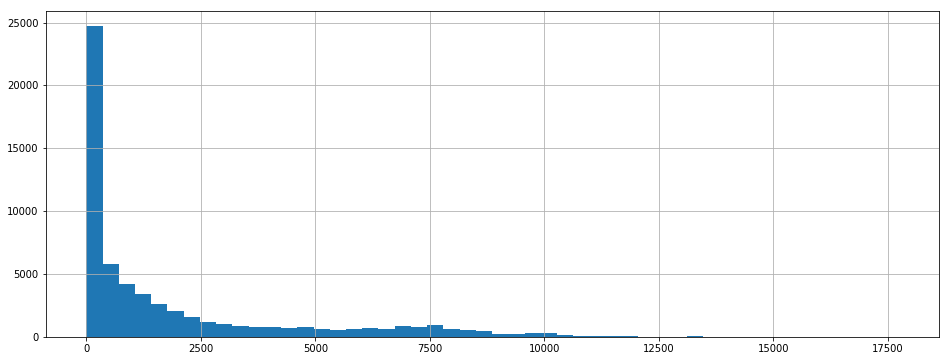

In [97]:
df['fr_wthr_fclt_dstnc'].hist(figsize=[16, 6], bins=50)

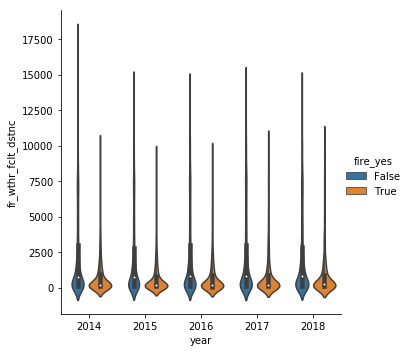

In [112]:
sns.catplot(hue='fire_yes', y='fr_wthr_fclt_dstnc', x='year', data=df, kind='violin')
plt.show()

## ahsm_dstnc 자동심장충격기와의 거리 
상관없을것 같은데, 외진 곳일수록 자동심장충격기도 적어서 결국 외진 곳에서 화재발생 많이 난다는 뜻?

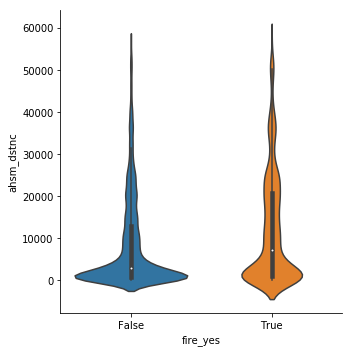

In [120]:
sns.catplot(
    x='fire_yes'
            , y='ahsm_dstnc'
            , data=df
            , kind='violin')
plt.show()

## fr_wthr_fclt_in_100m 반경 100m 내 소방용수시설 수
- 100m 내 소방용수시설이 많을수록 화재발생
- 불이 많이 나는 곳일수록 소방용수시설 많이 설치?
- 대부분 없다

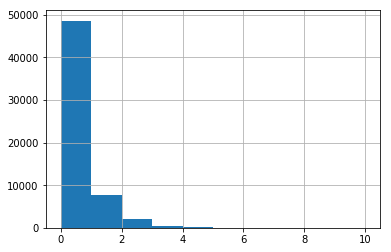

In [129]:
#100m 내 소방용수시설수 전체

df['fr_wthr_fclt_in_100m'].hist()

                         id
fr_wthr_fclt_in_100m       
0                     48609
1                      7668
2                      2168
3                       533
4                       167
5                        36
6                        11
7                         5
8                         1
10                        1


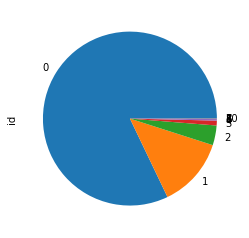

In [162]:
data =df.groupby('fr_wthr_fclt_in_100m')['id'].size()
print(pd.DataFrame(data))
data.plot.pie()

In [160]:
# 100m 내 소방용수시설수 화재발생건 only

data = pd.DataFrame(df.groupby('fr_wthr_fclt_in_100m')['fire_yes'].sum())
data
# data['fire_yes'].hist(bins=50)

,fire_yes
fr_wthr_fclt_in_100m,
0,5540.0
1,1448.0
2,485.0
3,124.0
4,45.0
5,11.0
6,2.0
7,2.0
8,0.0


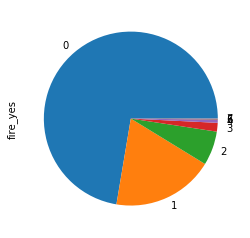

In [143]:
data = df.groupby('fr_wthr_fclt_in_100m')['fire_yes'].sum()

data.plot.pie()

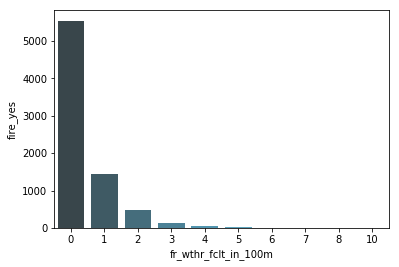

In [132]:
data = pd.DataFrame(df.groupby('fr_wthr_fclt_in_100m')['fire_yes'].sum()).reset_index()

sns.barplot(x='fr_wthr_fclt_in_100m', y='fire_yes', data=data, palette='GnBu_d')

## bldng_ar 건물 건축면적

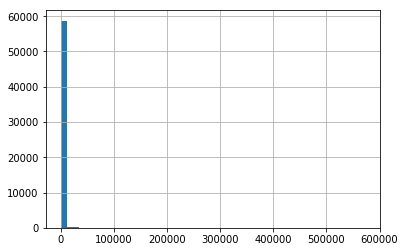

In [125]:
df['bldng_ar'].hist(bins=50)

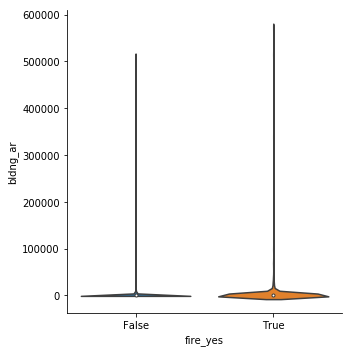

In [123]:
sns.catplot(
    x='fire_yes'
            , y='bldng_ar'
#             , x='year'
            , data=df
            , kind='violin')
plt.show()

## jmk 용도

In [167]:
df['jmk'].unique()

array(['대', '주', '잡', '종', '차', '답', '장', '양', '전', '창', '학', '목', '도',
       '임', '철', '유', '천', '구', '체', '과', '묘', '공', '원', '사', '제', '수'],
      dtype=object)

In [170]:
plt.rcParams['font.family'] = 'NanumGothic'

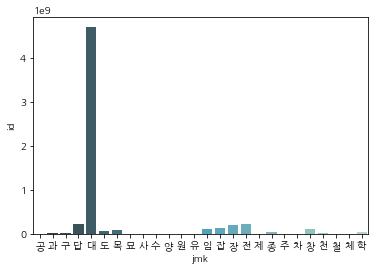

In [171]:
data = pd.DataFrame(df.groupby('jmk')['id'].sum()).reset_index()

sns.barplot(x='jmk', y='id', data=data, palette='GnBu_d')

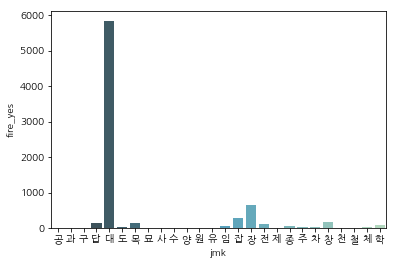

In [172]:
data = pd.DataFrame(df.groupby('jmk')['fire_yes'].sum()).reset_index()

sns.barplot(x='jmk', y='fire_yes', data=data, palette='GnBu_d')

In [ ]:
# 전체 '장' 중 화재발생 비율 계산 